Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 31.2 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
[*********************100%***********************]  1 of 1 completed
[*********************100%********************

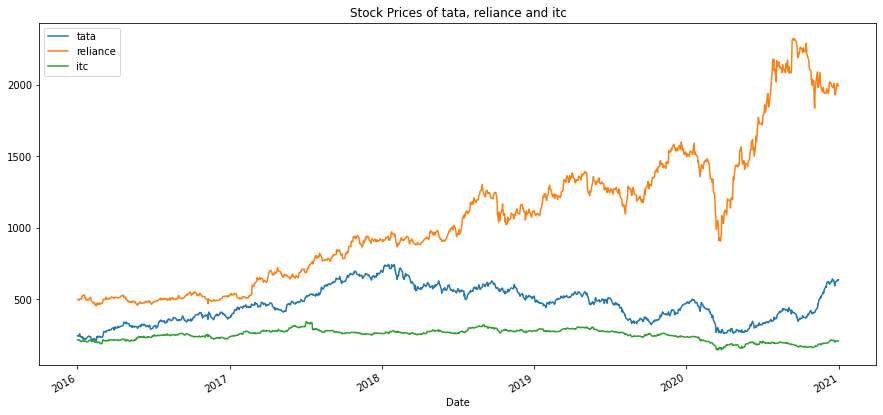

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
!pip install yfinance

import yfinance as yf

%matplotlib inline

start = "2016-01-01"
end = '2021-1-01'
tata = yf.download('TATASTEEL.NS',start,end)
reliance = yf.download('RELIANCE.NS',start,end)
itc = yf.download('ITC.NS',start,end)

tata['Open'].plot(label = 'tata', figsize = (15,7))
reliance['Open'].plot(label = "reliance")
itc['Open'].plot(label = 'itc')
plt.title('Stock Prices of tata, reliance and itc')
plt.legend()

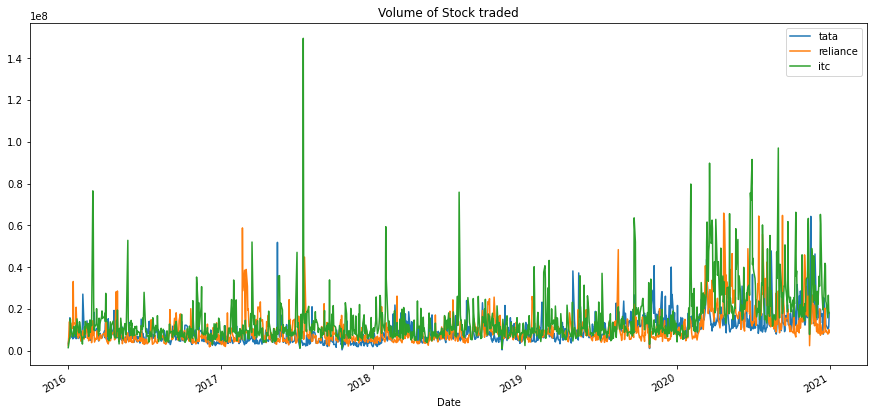

In [ ]:
tata['Volume'].plot(label = 'tata', figsize = (15,7))
reliance['Volume'].plot(label = "reliance")
itc['Volume'].plot(label = 'itc')

plt.title('Volume of Stock traded')
plt.legend()

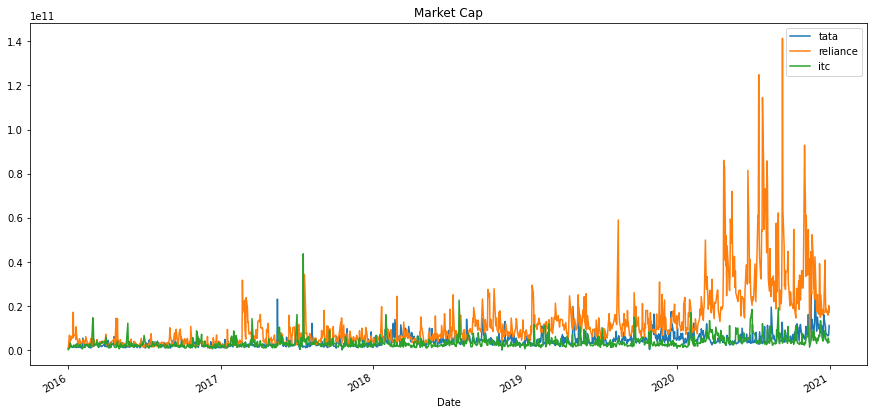

In [ ]:
#Market Capitalisation

tata['MarktCap'] = tata['Open'] * tata['Volume']
reliance['MarktCap'] = reliance['Open'] * reliance['Volume']
itc['MarktCap'] = itc['Open'] * itc['Volume']

tata['MarktCap'].plot(label = 'tata', figsize = (15,7))
reliance['MarktCap'].plot(label = 'reliance')
itc['MarktCap'].plot(label = 'itc')
plt.title('Market Cap')
plt.legend()


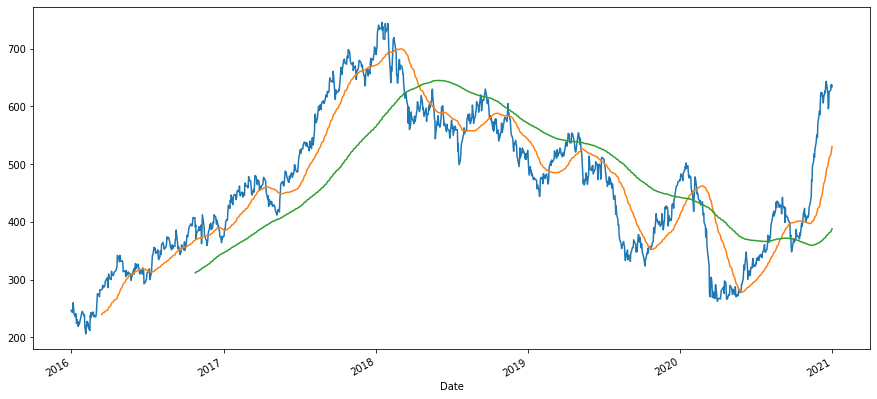

In [ ]:
tata['MA50'] = tata['Open'].rolling(50).mean()
tata['MA200'] = tata['Open'].rolling(200).mean()
tata['Open'].plot(figsize = (15,7))
tata['MA50'].plot()
tata['MA200'].plot()

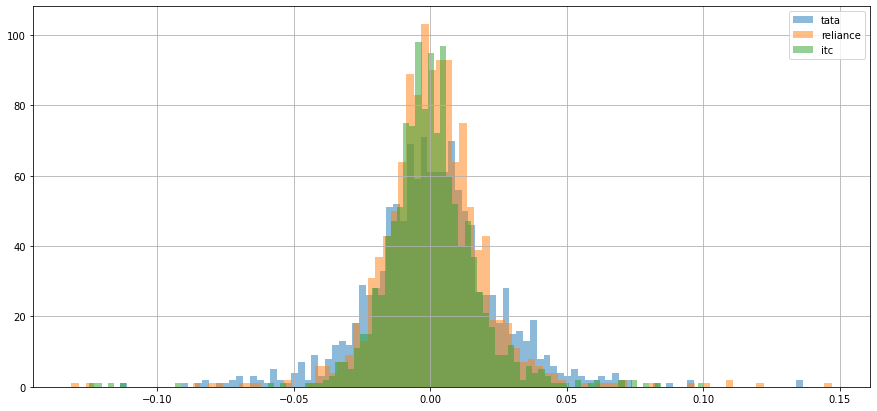

In [ ]:
#Volatility
tata['returns'] = (tata['Close']/tata['Close'].shift(1)) -1
reliance['returns'] = (reliance['Close']/reliance['Close'].shift(1))-1
itc['returns'] = (itc['Close']/itc['Close'].shift(1)) - 1
tata['returns'].hist(bins = 100, label = 'tata', alpha = 0.5, figsize = (15,7))
reliance['returns'].hist(bins = 100, label = 'reliance', alpha = 0.5)
itc['returns'].hist(bins = 100, label = 'itc', alpha = 0.5)
plt.legend()

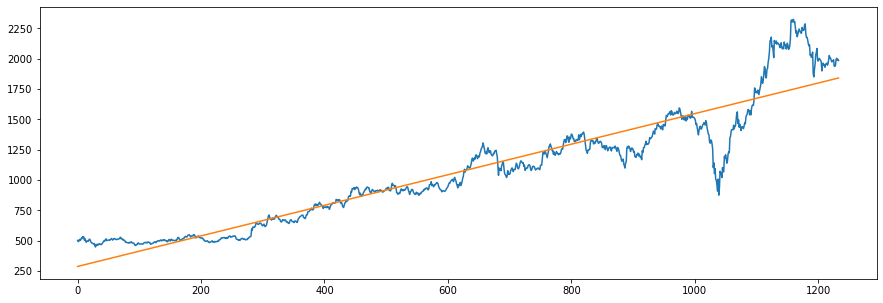

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
df = reliance.reset_index()
x = np.array(df.index).reshape(-1, 1)
y = df['Close']
linreg = LinearRegression().fit(x, y)
linreg.score(x, y)
predictions = linreg.predict(x)
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.plot(df.index, predictions)

In [ ]:
print('R^2:', linreg.score(x, y))


R^2: 0.8868525847044395


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MarktCap,returns
0,2016-01-01,500.158997,504.666260,499.366516,502.907928,484.996368,2499742,1.250268e+09,NaN
1,2016-01-04,497.781525,502.140198,488.717438,492.977081,475.419159,13923887,6.931054e+09,-0.019747
2,2016-01-05,495.453583,500.258057,493.819092,497.855835,480.124207,6897687,3.417484e+09,0.009897
3,2016-01-06,499.069336,514.324707,495.503113,511.253815,493.045013,12349673,6.163343e+09,0.026911
4,2016-01-07,505.731171,509.173553,499.292206,501.867798,483.993286,9109980,4.607201e+09,-0.018359
...,...,...,...,...,...,...,...,...,...
1229,2020-12-24,1947.000000,1998.800049,1945.900024,1994.150024,1987.755615,9588577,1.866896e+10,0.025877
1230,2020-12-28,2006.699951,2018.000000,1995.300049,2003.300049,1996.876221,7947719,1.594869e+10,0.004588
1231,2020-12-29,2009.000000,2012.300049,1982.550049,1990.050049,1983.668701,8589407,1.725612e+10,-0.006614
1232,2020-12-30,1995.250000,2007.199951,1975.550049,1995.500000,1989.101196,10173132,2.029794e+10,0.002739


In [ ]:
df1=df['Close']
df1

0        502.907928
1        492.977081
2        497.855835
3        511.253815
4        501.867798
           ...     
1229    1994.150024
1230    2003.300049
1231    1990.050049
1232    1995.500000
1233    1985.300049
Name: Close, Length: 1234, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.02873276]
 [0.02343781]
 [0.02603907]
 ...
 [0.82165054]
 [0.82455636]
 [0.81911792]]


In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(802, 432)

In [ ]:
train_data

array([[0.02873276],
       [0.02343781],
       [0.02603907],
       [0.03318264],
       [0.02817818],
       [0.03147928],
       [0.03830594],
       [0.03668179],
       [0.04497417],
       [0.04096004],
       [0.04403664],
       [0.02912889],
       [0.03619326],
       [0.02588062],
       [0.02050643],
       [0.02577497],
       [0.02572215],
       [0.02450736],
       [0.0291421 ],
       [0.03402773],
       [0.03268088],
       [0.02498272],
       [0.01976697],
       [0.01756185],
       [0.01699406],
       [0.0143928 ],
       [0.01345529],
       [0.01481533],
       [0.00475358],
       [0.        ],
       [0.01061634],
       [0.00633811],
       [0.01216125],
       [0.00886015],
       [0.00998252],
       [0.01472291],
       [0.01138219],
       [0.01217446],
       [0.00991651],
       [0.01156705],
       [0.01587169],
       [0.01974057],
       [0.02507515],
       [0.02807255],
       [0.02636917],
       [0.03180939],
       [0.03569148],
       [0.027

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(701, 100)
(701,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(331, 100)
(331,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 11s 370ms/step - loss: 0.0187 - val_loss: 0.0508
Epoch 2/100
11/11 [==============================] - 2s 214ms/step - loss: 0.0039 - val_loss: 0.0062
Epoch 3/100
11/11 [==============================] - 2s 211ms/step - loss: 0.0014 - val_loss: 0.0078
Epoch 4/100
11/11 [==============================] - 2s 216ms/step - loss: 7.7570e-04 - val_loss: 0.0056
Epoch 5/100
11/11 [==============================] - 2s 216ms/step - loss: 6.2729e-04 - val_loss: 0.0058
Epoch 6/100
11/11 [==============================] - 2s 218ms/step - loss: 5.5065e-04 - val_loss: 0.0051
Epoch 7/100
11/11 [==============================] - 2s 223ms/step - loss: 5.2008e-04 - val_loss: 0.0052
Epoch 8/100
11/11 [==============================] - 2s 218ms/step - loss: 5.1886e-04 - val_loss: 0.0056
Epoch 9/100
11/11 [==============================] - 2s 216ms/step - loss: 4.9651e-04 - val_loss: 0.0050
Epoch 10/100
11/11 [==============================] - 2s 217ms/ste

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

881.5397311972638

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

1696.9885005690205

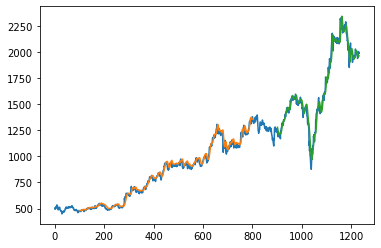

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

432

In [ ]:
x_input=test_data[332:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8982954862562547,
 0.8949897823549675,
 0.8920305948460894,
 0.8876318413027819,
 0.8756619258767984,
 0.8901644569792317,
 0.897095826198989,
 0.8787010386542486,
 0.8705966945238988,
 0.8780078756979834,
 0.8707299900858172,
 0.9001616241231123,
 0.8859256841445158,
 0.8888847414819467,
 0.8699834568362057,
 0.8734758265927576,
 0.8953096136007033,
 0.8867254575160262,
 0.8681440041160211,
 0.8710231361848799,
 0.8840595462776579,
 0.9129846832139525,
 0.9943749012527539,
 0.9974406991768772,
 0.98826999055118,
 0.9969608872225497,
 1.0,
 0.9862438719757309,
 0.9899494625627732,
 0.963370405619111,
 0.9395370550109419,
 0.950014164280597,
 0.9235682727274059,
 0.9344985088047153,
 0.9422563365426562,
 0.9576120113099462,
 0.9519069872941277,
 0.9470549767717189,
 0.9400969224052886,
 0.9391106133499607,
 0.9642501042591936,
 0.9545195282391497,
 0.9514270451683533,
 0.9533465533285572,
 0.9766199063709324,
 0.9802455716894025,
 0.9370578096278384,
 0.9206891406585471,
 0.920902361

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.81828177]
101
1 day input [0.89498978 0.89203059 0.88763184 0.87566193 0.89016446 0.89709583
 0.87870104 0.87059669 0.87800788 0.87072999 0.90016162 0.88592568
 0.88888474 0.86998346 0.87347583 0.89530961 0.88672546 0.868144
 0.87102314 0.88405955 0.91298468 0.9943749  0.9974407  0.98826999
 0.99696089 1.         0.98624387 0.98994946 0.96337041 0.93953706
 0.95001416 0.92356827 0.93449851 0.94225634 0.95761201 0.95190699
 0.94705498 0.94009692 0.93911061 0.9642501  0.95451953 0.95142705
 0.95334655 0.97661991 0.98024557 0.93705781 0.92068914 0.92090236
 0.91007874 0.89339024 0.88397949 0.88723195 0.84247127 0.84535046
 0.83306059 0.84129829 0.85601411 0.76161416 0.74719162 0.78067543
 0.80296247 0.84249795 0.85398799 0.87203626 0.82546274 0.81629203
 0.82503623 0.82818202 0.8233567  0.82013092 0.81263975 0.77337086
 0.80066976 0.8077878  0.79912359 0.80168282 0.78952631 0.80290917
 0.80464201 0.8077878  0.79856372 0.80466863 0.82362329 0.84132491
 0.83068795 0.83004816 0.82231702 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
import matplotlib.pyplot as plt
len(df1)

1234

In [ ]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

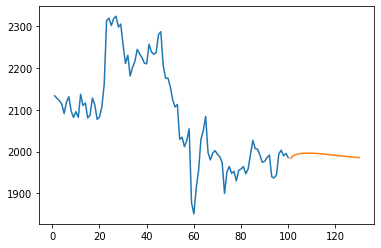

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1134:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

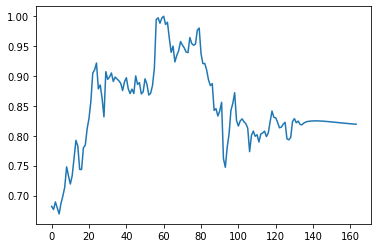

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])

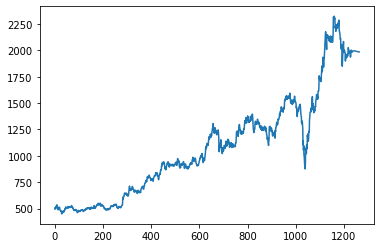

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)